In [1]:
%reload_ext autoreload
%autoreload 2

from ripple_heterogeneity.utils import (
    functions,
    loading,
    batch_analysis,
)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nelpy as nel
import glob
import os

functions.set_plotting_defaults()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## check data per session

In [2]:
# files = glob.glob(r'X:\AD_sessions\**\*session.mat',recursive=True)
# basepath = [os.path.dirname(file) for file in files]
# df = pd.DataFrame({"basepath":basepath})
# df.to_csv(r"D:\github\ad_ied\data\sessions.csv",index=True)
df = pd.read_csv(r"D:\github\ad_ied\data\sessions.csv")
df.head()

,Unnamed: 0,basepath
0,0,X:\AD_sessions\AZ10\AZ10_210317_sess2
1,1,X:\AD_sessions\AZ10\AZ10_210322_sess4
2,2,X:\AD_sessions\AZ10\AZ10_210324_sess5
3,3,X:\AD_sessions\AZ10\AZ10_210329_sess6
4,4,X:\AD_sessions\AZ10\AZ10_210412_sess9


In [42]:
for basepath in df.basepath:
    try:
        position_df = loading.load_animal_behavior(basepath)
    except:
        print(basepath)
        continue
    if position_df is None:
        print(basepath)

In [7]:
for basepath in df.basepath:
    epoch_df_ = loading.load_epoch(basepath)
    display(epoch_df_)

,name,startTime,stopTime,environment
0,AZ10_210317_095318,0.000,6202.72795,sleep
1,AZ10_210317_113643,6202.728,13544.81995,sleep
2,AZ10_210317_144206,13544.820,15231.77995,tmaze
3,AZ10_210317_151242,15231.780,21563.49595,sleep
4,AZ10_210317_165852,21563.496,24710.83195,sleep


,name,startTime,stopTime,environment
0,AZ10_210322_121513,0.000,8090.06395,sleep
1,AZ10_210322_152007,8090.064,10152.95995,tmaze
2,AZ10_210322_154557,10152.960,17573.94000,sleep


,name,startTime,stopTime,environment
0,AZ10_210324_100705,0.000,10513.47595,sleep
1,AZ10_210324_130832,10513.476,12099.31195,tmaze
2,AZ10_210324_133825,12099.312,25966.11840,sleep


,name,startTime,stopTime,environment
0,AZ10_210329_133240,0.000,7407.43195,sleep
1,AZ10_210329_153729,7407.432,9384.58795,tmaze
2,AZ10_210329_161253,9384.588,16657.66990,sleep


,name,startTime,stopTime,environment
0,AZ10_210412_125419,0.000,6668.49595,sleep
1,AZ10_210412_144603,6668.496,10871.17195,sleep
2,AZ10_210412_155919,10871.172,13692.81595,tmaze
3,AZ10_210412_164756,13692.816,19522.94200,sleep


,name,startTime,stopTime,environment
0,AZ10_210419_134857,0.000,7609.46395,sleep
1,AZ10_210419_155539,7609.464,11302.52395,tmaze
2,AZ10_210419_165924,11302.524,17336.44795,sleep


,name,startTime,stopTime,environment
0,AZ10_210806_100711,0.000,5958.57595,sleep
1,AZ10_210806_121752,5958.576,7746.37195,tmaze
2,AZ10_210806_131128,7746.372,17720.20795,sleep


,name,startTime,stopTime,environment
0,AZ11_210325_111949,0.000,7981.48795,sleep
1,AZ11_210325_142839,7981.488,9091.00795,tmaze
2,AZ11_210325_144905,9091.008,14891.00395,sleep


,name,startTime,stopTime,environment
0,AZ11_210422_094415,0.000,7210.54795,sleep
1,AZ11_210422_114437,7210.548,10843.01995,tmaze
2,AZ11_210422_124710,10843.020,23516.02795,sleep


,name,startTime,stopTime,environment
0,AZ11_210427_103205,0.000,6538.85995,sleep
1,AZ11_210427_122213,6538.860,9111.16795,tmaze
2,AZ11_210427_130856,9111.168,20939.97595,sleep


,name,startTime,stopTime,environment
0,AZ12_210317_095933,0.0000,13210.29115,sleep
1,AZ12_210317_134530,13210.2912,16366.59115,tmaze
2,AZ12_210317_144010,16366.5912,26049.76315,sleep


,name,startTime,stopTime,environment
0,AZ12_210323_132824,0.000,7440.19195,sleep
1,AZ12_210323_153733,7440.192,9462.02395,tmaze
2,AZ12_210323_161322,9462.024,22405.35595,sleep


,name,startTime,stopTime,environment
0,AZ12_210325_103434,0.000,10121.07595,sleep
1,AZ12_210325_132516,10121.076,11784.27595,tmaze
2,AZ12_210325_135946,11784.276,20225.91595,sleep


,name,startTime,stopTime,environment
0,AZ12_210330_135049,0.0000,9347.18515,sleep
1,AZ12_210330_171015,9347.1852,11568.16915,tmaze
2,AZ12_210330_175022,11568.1692,18701.74915,sleep


,name,startTime,stopTime,environment
0,AZ12_210413_125225,0.000,7918.09195,sleep
1,AZ12_210413_150803,7918.092,10472.11195,tmaze
2,AZ12_210413_155605,10472.112,18018.46795,sleep


,name,startTime,stopTime,environment
0,AZ13_220930_114439,0.000,9313.66795,sleep
1,AZ13_220930_142221,9313.668,11661.11995,tmaze
2,AZ13_220930_150235,11661.120,19546.73995,sleep


,name,startTime,stopTime,environment
0,AZ13_221003_131946,0.000,7346.30395,sleep
1,AZ13_221003_162535,7346.304,9250.23595,tmaze
2,AZ13_221003_165805,9250.236,16847.45995,sleep


,name,startTime,stopTime,environment
0,AZ13_221007_104741,0.000,8469.64795,sleep
1,AZ13_221007_131445,8469.648,10837.22395,tmaze
2,AZ13_221007_135522,10837.224,21409.37995,sleep


,name,startTime,stopTime,environment
0,AZ15_221102_121634,0.000,7484.97595,sleep
1,AZ15_221102_143931,7484.976,10848.92395,tmaze
2,AZ15_221102_153711,10848.924,20654.67595,sleep


,name,startTime,stopTime,environment
0,AZ16_221101_121355,0.000,7217.38795,sleep
1,AZ16_221101_153251,7217.388,9692.99995,tmaze
2,AZ16_221101_161446,9693.000,24605.67595,sleep


,name,startTime,stopTime,environment
0,AZ16_221104_113802,0.000,7809.80395,sleep
1,AZ16_221104_143605,7809.804,11694.77995,tmaze
2,AZ16_221104_154548,11694.780,22198.96795,sleep


,name,startTime,stopTime,environment
0,AZ16_221109_121453,0.000,7922.01595,sleep
1,AZ16_221109_160142,7922.016,10934.35195,tmaze
2,AZ16_221109_165305,10934.352,21142.72795,sleep


,name,startTime,stopTime,environment
0,AZ18_221119_sess4,0.00000,8833.86000,sleep
1,AZ18_221119_sess4_2,8833.86000,11155.03195,tmaze
2,AZ18_221119_sess4_3,11155.03195,20009.48400,sleep


,name,startTime,stopTime,environment
0,AZ18_221120_sess5,0.00000,7868.23200,sleep
1,AZ18_221120_sess5_2,7868.23200,10470.13195,tmaze
2,AZ18_221120_sess5_3,10470.13195,18615.80000,sleep


,name,startTime,stopTime,environment
0,AZ18_221121_sess6,0.00000,10611.07200,sleep
1,AZ18_221121_sess6_2,10611.07200,13275.10795,tmaze
2,AZ18_221121_sess6_3,13275.10795,20776.53600,sleep


,name,startTime,stopTime,environment
0,AZ18_221124_sess8,0.00000,7216.56000,sleep
1,AZ18_221124_sess8_2,7216.56000,10436.97595,tmaze
2,AZ18_221124_sess8_3,10436.97595,18828.28800,sleep


,name,startTime,stopTime,environment
0,AZ18_221129_sess10,0.0,7861.46400,sleep
1,AZ18_221129_sess10_2,7861.5,10402.45195,tmaze
2,AZ18_221129_sess10_3,10402.0,26514.25200,sleep


,name,startTime,stopTime,environment
0,Naz1_210324_103912,0.00000,8585.928,sleep
1,Naz1_210324_133918,8585.92805,9896.868,tmaze
2,Naz1_210324_140332,9896.86805,22250.700,sleep


,name,startTime,stopTime,environment
0,Naz1_210811_125401,0.0000,12092.58135,sleep
1,Naz1_210811_161607,12092.5814,13525.34535,tmaze
2,Naz1_210811_164156,13525.3454,24064.02135,sleep


In [43]:
epoch_df = pd.DataFrame()

for basepath in df.basepath:
    epoch_df_ = loading.load_epoch(basepath)
    epoch_df_["basepath"] = basepath
    epoch_df = pd.concat([epoch_df,epoch_df_],ignore_index=True)

epoch_df

,name,startTime,stopTime,environment,basepath
0,AZ10_210317_095318,0.00000,6202.72795,sleep,X:\AD_sessions\AZ10\AZ10_210317_sess2
1,AZ10_210317_113643,6202.72800,13544.81995,sleep,X:\AD_sessions\AZ10\AZ10_210317_sess2
2,AZ10_210317_144206,13544.82000,15231.77995,tmaze,X:\AD_sessions\AZ10\AZ10_210317_sess2
3,AZ10_210317_151242,15231.78000,21563.49595,sleep,X:\AD_sessions\AZ10\AZ10_210317_sess2
4,AZ10_210317_165852,21563.49600,24710.83195,sleep,X:\AD_sessions\AZ10\AZ10_210317_sess2
...,...,...,...,...,...
85,Naz1_210324_133918,8585.92805,9896.86800,tmaze,X:\AD_sessions\Naz1\Naz1_210324_sess5
86,Naz1_210324_140332,9896.86805,22250.70000,sleep,X:\AD_sessions\Naz1\Naz1_210324_sess5
87,Naz1_210811_125401,0.00000,12092.58135,sleep,X:\AD_sessions\Naz1\Naz1_210811_sess26
88,Naz1_210811_161607,12092.58140,13525.34535,tmaze,X:\AD_sessions\Naz1\Naz1_210811_sess26


In [44]:
epoch_df[epoch_df.environment.isna()].basepath.unique()


array([], dtype=object)

In [22]:
for basepath in df.basepath:
    print(basepath)
    loading.load_brain_regions(basepath)

X:\AD_sessions\AZ10\AZ10_210317_sess2
X:\AD_sessions\AZ10\AZ10_210322_sess4
X:\AD_sessions\AZ10\AZ10_210324_sess5
X:\AD_sessions\AZ10\AZ10_210329_sess6
X:\AD_sessions\AZ10\AZ10_210412_sess9
X:\AD_sessions\AZ10\AZ10_210419_sess11
X:\AD_sessions\AZ10\AZ10_210806_sess25
X:\AD_sessions\AZ11\AZ11_210325_sess1
X:\AD_sessions\AZ11\AZ11_210422_sess7
X:\AD_sessions\AZ11\AZ11_210427_sess8
X:\AD_sessions\AZ12\AZ12_210317_sess2
X:\AD_sessions\AZ12\AZ12_210323_sess3
X:\AD_sessions\AZ12\AZ12_210325_sess4
X:\AD_sessions\AZ12\AZ12_210330_sess5
X:\AD_sessions\AZ12\AZ12_210413_sess7
X:\AD_sessions\AZ13\AZ13_220930_sess7
X:\AD_sessions\AZ13\AZ13_221003_sess8
X:\AD_sessions\AZ13\AZ13_221007_sess12
X:\AD_sessions\AZ15\AZ15_221102_sess8
X:\AD_sessions\AZ16\AZ16_221101_sess4
X:\AD_sessions\AZ16\AZ16_221104_sess7
X:\AD_sessions\AZ16\AZ16_221109_sess10
X:\AD_sessions\AZ18\AZ18_221119_sess4
X:\AD_sessions\AZ18\AZ18_221120_sess5
X:\AD_sessions\AZ18\AZ18_221121_sess6
X:\AD_sessions\AZ18\AZ18_221124_sess8
X:\AD_se

In [6]:
for basepath in df.basepath:
    print(basepath)
    ieds = loading.load_ied_events(basepath)


X:\AD_sessions\AZ10\AZ10_210317_sess2
X:\AD_sessions\AZ10\AZ10_210322_sess4
X:\AD_sessions\AZ10\AZ10_210324_sess5
X:\AD_sessions\AZ10\AZ10_210329_sess6
X:\AD_sessions\AZ10\AZ10_210412_sess9
X:\AD_sessions\AZ10\AZ10_210419_sess11
X:\AD_sessions\AZ10\AZ10_210806_sess25
X:\AD_sessions\AZ11\AZ11_210325_sess1
X:\AD_sessions\AZ11\AZ11_210422_sess7
X:\AD_sessions\AZ11\AZ11_210427_sess8
X:\AD_sessions\AZ12\AZ12_210317_sess2
X:\AD_sessions\AZ12\AZ12_210323_sess3
X:\AD_sessions\AZ12\AZ12_210325_sess4
X:\AD_sessions\AZ12\AZ12_210330_sess5
X:\AD_sessions\AZ12\AZ12_210413_sess7
X:\AD_sessions\AZ13\AZ13_220930_sess7
X:\AD_sessions\AZ13\AZ13_221003_sess8
X:\AD_sessions\AZ13\AZ13_221007_sess12
X:\AD_sessions\AZ15\AZ15_221102_sess8
X:\AD_sessions\AZ16\AZ16_221101_sess4
X:\AD_sessions\AZ16\AZ16_221104_sess7
X:\AD_sessions\AZ16\AZ16_221109_sess10
X:\AD_sessions\AZ18\AZ18_221119_sess4
X:\AD_sessions\AZ18\AZ18_221120_sess5
X:\AD_sessions\AZ18\AZ18_221121_sess6
X:\AD_sessions\AZ18\AZ18_221124_sess8
X:\AD_se

In [45]:
# for basepath in df.basepath:
#     print(basepath)
#     ripples = loading.load_ripples_events(basepath)

n_intervals = []
ripple_rate = []
for basepath in df.basepath:
    ripples = loading.load_ripples_events(basepath,return_epoch_array=True)
    beh_epochs = loading.load_epoch(basepath)
    beh_epochs = nel.EpochArray(np.array(beh_epochs[["startTime","stopTime"]]))
    n_intervals.append(ripples.n_intervals)
    ripple_rate.append(ripples.n_intervals / beh_epochs.duration)

ripples_df = pd.DataFrame()
ripples_df["n_intervals"] = n_intervals
ripples_df["ripple_rate"] = ripple_rate
ripples_df["basepath"] = df.basepath
ripples_df.sort_values(by="ripple_rate",inplace=True)
ripples_df

,n_intervals,ripple_rate,basepath
24,534,0.025702,X:\AD_sessions\AZ18\AZ18_221121_sess6
20,1231,0.055453,X:\AD_sessions\AZ16\AZ16_221104_sess7
3,1438,0.086327,X:\AD_sessions\AZ10\AZ10_210329_sess6
10,2595,0.099617,X:\AD_sessions\AZ12\AZ12_210317_sess2
21,2332,0.110298,X:\AD_sessions\AZ16\AZ16_221109_sess10
4,2252,0.115351,X:\AD_sessions\AZ10\AZ10_210412_sess9
23,2206,0.118501,X:\AD_sessions\AZ18\AZ18_221120_sess5
22,2729,0.136385,X:\AD_sessions\AZ18\AZ18_221119_sess4
2,3617,0.139297,X:\AD_sessions\AZ10\AZ10_210324_sess5
14,2540,0.140966,X:\AD_sessions\AZ12\AZ12_210413_sess7


<AxesSubplot: xlabel='ripple_rate', ylabel='basepath'>

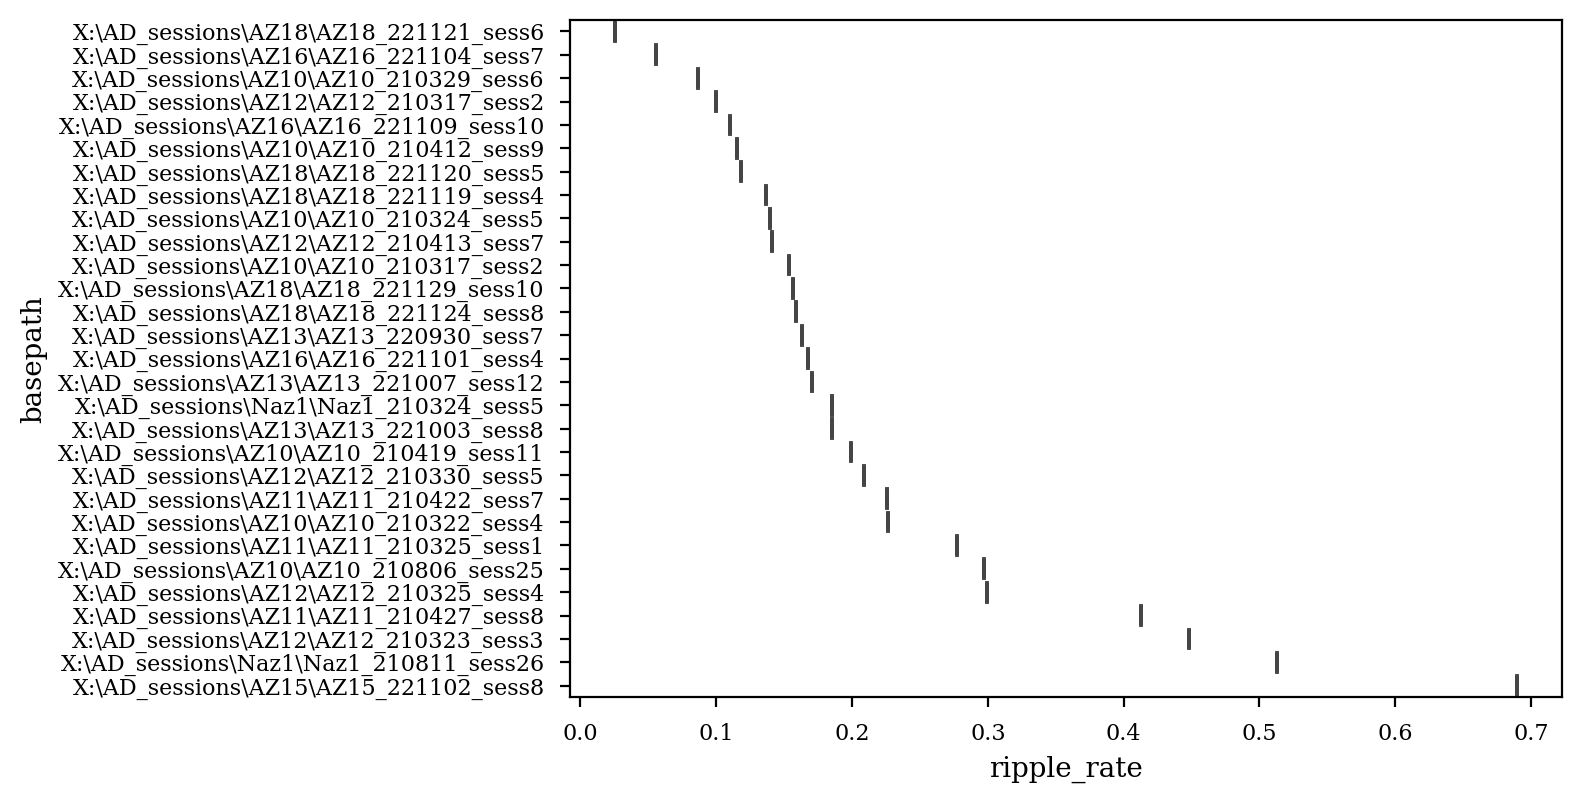

In [46]:
sns.boxplot(data=ripples_df,y="basepath",x="ripple_rate")

In [47]:
for basepath in df.basepath:
    print(basepath)
    loading.load_spikes(basepath)

X:\AD_sessions\AZ10\AZ10_210317_sess2
X:\AD_sessions\AZ10\AZ10_210322_sess4
X:\AD_sessions\AZ10\AZ10_210324_sess5
X:\AD_sessions\AZ10\AZ10_210329_sess6
X:\AD_sessions\AZ10\AZ10_210412_sess9
X:\AD_sessions\AZ10\AZ10_210419_sess11
X:\AD_sessions\AZ10\AZ10_210806_sess25
X:\AD_sessions\AZ11\AZ11_210325_sess1
X:\AD_sessions\AZ11\AZ11_210422_sess7
X:\AD_sessions\AZ11\AZ11_210427_sess8
X:\AD_sessions\AZ12\AZ12_210317_sess2
X:\AD_sessions\AZ12\AZ12_210323_sess3
X:\AD_sessions\AZ12\AZ12_210325_sess4
X:\AD_sessions\AZ12\AZ12_210330_sess5
X:\AD_sessions\AZ12\AZ12_210413_sess7
X:\AD_sessions\AZ13\AZ13_220930_sess7
X:\AD_sessions\AZ13\AZ13_221003_sess8
X:\AD_sessions\AZ13\AZ13_221007_sess12
X:\AD_sessions\AZ15\AZ15_221102_sess8
X:\AD_sessions\AZ16\AZ16_221101_sess4
X:\AD_sessions\AZ16\AZ16_221104_sess7
X:\AD_sessions\AZ16\AZ16_221109_sess10
X:\AD_sessions\AZ18\AZ18_221119_sess4
X:\AD_sessions\AZ18\AZ18_221120_sess5
X:\AD_sessions\AZ18\AZ18_221121_sess6
X:\AD_sessions\AZ18\AZ18_221124_sess8
X:\AD_se

In [28]:
for basepath in df.basepath:
    print(basepath)
    loading.load_SleepState_states(basepath)

X:\AD_sessions\AZ10\AZ10_210317_sess2
X:\AD_sessions\AZ10\AZ10_210322_sess4
X:\AD_sessions\AZ10\AZ10_210324_sess5
X:\AD_sessions\AZ10\AZ10_210329_sess6
X:\AD_sessions\AZ10\AZ10_210412_sess9
X:\AD_sessions\AZ10\AZ10_210419_sess11
X:\AD_sessions\AZ10\AZ10_210806_sess25
X:\AD_sessions\AZ11\AZ11_210325_sess1
X:\AD_sessions\AZ11\AZ11_210422_sess7
X:\AD_sessions\AZ11\AZ11_210427_sess8
X:\AD_sessions\AZ12\AZ12_210317_sess2
X:\AD_sessions\AZ12\AZ12_210323_sess3
X:\AD_sessions\AZ12\AZ12_210325_sess4
X:\AD_sessions\AZ12\AZ12_210330_sess5
X:\AD_sessions\AZ12\AZ12_210413_sess7
X:\AD_sessions\AZ13\AZ13_220930_sess7
X:\AD_sessions\AZ13\AZ13_221003_sess8
X:\AD_sessions\AZ13\AZ13_221007_sess12
X:\AD_sessions\AZ15\AZ15_221102_sess8
X:\AD_sessions\AZ16\AZ16_221101_sess4
X:\AD_sessions\AZ16\AZ16_221104_sess7
X:\AD_sessions\AZ16\AZ16_221109_sess10
X:\AD_sessions\AZ18\AZ18_221119_sess4
X:\AD_sessions\AZ18\AZ18_221120_sess5
X:\AD_sessions\AZ18\AZ18_221121_sess6
X:\AD_sessions\AZ18\AZ18_221124_sess8
X:\AD_se